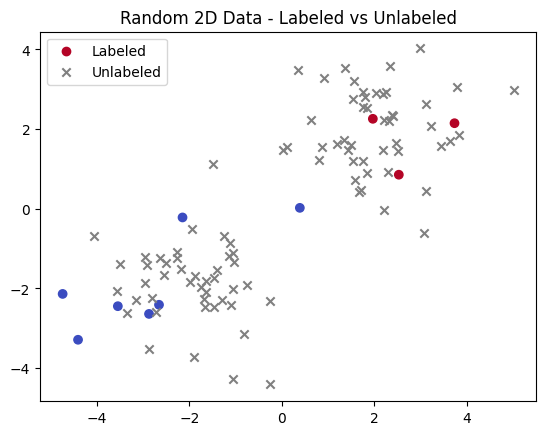

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Veri üret
N = 100
l = 10
u = N - l

class_1 = np.random.randn(N//2, 2) + np.array([2, 2])
class_2 = np.random.randn(N//2, 2) + np.array([-2, -2])
X = np.vstack((class_1, class_2))
y_true = np.array([1] * (N//2) + [-1] * (N//2))

# Karıştır
idx = np.random.permutation(N)
X = X[idx]
y_true = y_true[idx]

labeled_indices = np.random.choice(N, l, replace=False)
unlabeled_indices = np.setdiff1d(np.arange(N), labeled_indices)

y_labeled = np.full(N, np.nan)
y_labeled[labeled_indices] = y_true[labeled_indices]

# Görselleştir
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y_labeled[labeled_indices], cmap='coolwarm', marker='o', label="Labeled")
plt.scatter(X[unlabeled_indices, 0], X[unlabeled_indices, 1], color='gray', marker='x', label="Unlabeled")
plt.legend()
plt.title("Random 2D Data - Labeled vs Unlabeled")
plt.show()


In [2]:
def rbf_similarity(x1, x2, sigma=1.0):
    dist_sq = np.sum((x1 - x2) ** 2)
    return np.exp(-dist_sq / (sigma ** 2))

W = np.zeros((len(labeled_indices), len(unlabeled_indices)))
W_tilde = np.zeros((len(unlabeled_indices), len(unlabeled_indices)))

sigma = 1.0

for i, li in enumerate(labeled_indices):
    for j, uj in enumerate(unlabeled_indices):
        W[i, j] = rbf_similarity(X[li], X[uj], sigma=sigma)

for i, ui in enumerate(unlabeled_indices):
    for j, uj in enumerate(unlabeled_indices):
        if i != j:
            W_tilde[i, j] = rbf_similarity(X[ui], X[uj], sigma=sigma)


In [3]:
# Başlangıç tahmini
y_unlabeled = np.random.randn(len(unlabeled_indices))
y_l = y_true[labeled_indices]

max_iter = 100

for epoch in range(max_iter):
    for j, uj in enumerate(unlabeled_indices):
        numerator = 0.0
        denominator = 0.0

        # Etiketli noktalar
        for i, li in enumerate(labeled_indices):
            numerator += W[i, j] * y_l[i]
            denominator += W[i, j]

        # Diğer etiketsizler (y_i sabit tutuluyor)
        for i, ui in enumerate(unlabeled_indices):
            if i != j:
                numerator += W_tilde[i, j] * y_unlabeled[i]
                denominator += W_tilde[i, j]

        if denominator > 0:
            y_unlabeled[j] = numerator / denominator


Accuracy (Coordinate Minimization): 1.00


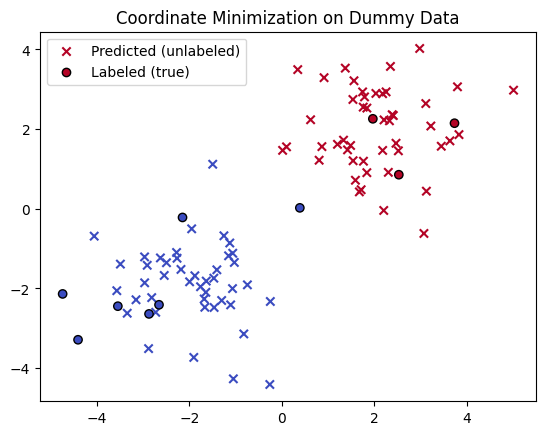

In [4]:
from sklearn.metrics import accuracy_score

y_pred = np.sign(y_unlabeled)
acc = accuracy_score(y_true[unlabeled_indices], y_pred)
print(f"Accuracy (Coordinate Minimization): {acc:.2f}")

plt.scatter(X[unlabeled_indices, 0], X[unlabeled_indices, 1], c=y_pred, cmap='coolwarm', marker='x', label="Predicted (unlabeled)")
plt.scatter(X[labeled_indices, 0], X[labeled_indices, 1], c=y_true[labeled_indices], cmap='coolwarm', marker='o', edgecolor='k', label="Labeled (true)")
plt.title("Coordinate Minimization on Dummy Data")
plt.legend()
plt.show()
